In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

BASE_DIR = "/Users/user/Desktop/Projects/data-science/ml-data"
FILE_DIR = "4-Algerian_forest_fires_dataset.csv"

path = os.path.join(BASE_DIR, FILE_DIR)

df = pd.read_csv(path)

%matplotlib inline 

In [96]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [97]:
def analyze_df(df: pd.DataFrame):
    print(20 * "-", "Columns", 20 * "-")
    print(df.columns)
    print(20 * "-", "First 5 Data in the Dataframe", 20 * "-")
    print(df.head(5))
    print(20 * "-", "DF INFO", 20 * "-")
    print(df.info())
    print(20 * "-", "DF DESCRIBE", 20 * "-")
    print(df.describe())
    print(20 * "-", "NULL COUNt", 20 * "-")
    print(df.isna().sum())
    print(20 * "-", "DF SHAPE", 20 * "-")
    print(df.shape)
    print(20 * "-", "DF DUPLICATES", 20 * "-")
    print(df.duplicated().sum())
    print(20 * "-", "DF UNIQUE VALUES", 20 * "-")
    print(df.nunique())
    print(20 * "-", "DF VALUE COUNTS", 20 * "-")
    print(df.value_counts())
    print(20 * "-", "UNIQUE VALUES EACH COLUMN", 20 * "-")
    for col in df.columns:
        print(20 * "-", f"{col} UNIQUE VALUES", 20 * "-")
        print(df[col].unique())
         
def grab_col_names(df: pd.DataFrame, cat_th: int = 10, car_th: int = 20) -> tuple[list, list, list]:
    """
    Identifies and categorizes columns in a dataframe as categorical, numerical, or categorical but cardinal.
    
    Parameters:
    -----------
    df: pd.DataFrame
        The input dataframe
    cat_th: int, default=10
        Threshold for numerical columns to be considered categorical
    car_th: int, default=20
        Threshold for categorical columns to be considered cardinal
        
    Returns:
    --------
    tuple[list, list, list]:
        cat_cols: Categorical columns
        num_cols: Numerical columns
        categorical_but_car: Categorical but cardinal columns
    """
    # 1. Fix: Changed "0" to "O" for object dtype check
    categorical_cols = [col for col in df.columns if df[col].dtypes == "O"]
    
    # 2. Fix: Added proper dtype checks for numerical columns
    numerical_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and 
                        df[col].dtypes in ['int64', 'float64']]
    
    # 3. Fix: Check categorical columns for cardinality
    categorical_but_car = [col for col in categorical_cols if df[col].nunique() > car_th]
    
    # Combine categorical columns
    cat_cols = categorical_cols + numerical_but_cat
    cat_cols = [col for col in cat_cols if col not in categorical_but_car]
    
    # 4. Fix: Simplified numerical column identification
    num_cols = [col for col in df.columns if 
                df[col].dtypes in ['int64', 'float64'] and 
                col not in numerical_but_cat]
    
    # Print summary
    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")    
    print(f"cat_cols: {len(cat_cols)}")    
    print(f"num_cols: {len(num_cols)}")    
    print(f"cat_but_car: {len(categorical_but_car)}")
    print(f"num_but_cat: {len(numerical_but_cat)}")
    
    print("\nCategorical Cols:", cat_cols)
    print("\nNumerical Cols:", num_cols)
    print("\nCategorical but cardinal Cols:", categorical_but_car)
    
    return cat_cols, num_cols, categorical_but_car

In [98]:
def barplot_maker(df: pd.DataFrame, cat_x: str, cat_y: str, title: str):
    if not cat_x in df.columns or not cat_y in df.columns:
        raise ValueError(f"Column {cat_x} or {cat_y} not found in dataframe")
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cat_x, y=cat_y, data=df)
    plt.title(title, fontsize=14)
    plt.xlabel(cat_x, fontsize=12)
    plt.ylabel(cat_y, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

def subplot_maker(df: pd.DataFrame, num_cols):
    plt.figure(figsize=(20, 25))
    for i in range(0, len(num_cols)):
        plt.subplot(5, 3, i+1)
        sns.kdeplot(x=df[num_cols[i]], color="b", fill=True)
        plt.xlabel(num_cols[i], fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.title(num_cols[i], fontsize=14)
        plt.tight_layout()
    plt.show()


In [99]:
analyze_df(df)

-------------------- Columns --------------------
Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')
-------------------- First 5 Data in the Dataframe --------------------
  day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0   1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1   2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2   3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3   4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4   5     6  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire     
-------------------- DF INFO --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 co

# Potential Issues 
- Even the numerical columns are in str type
- In the Classes column there are values which represent the same thing but written wrong so it looks like different category
- Null values in all columns 
- Text data in some numerical columns 

In [100]:
df.isna().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [101]:
nan_rows = df[df.isna().any(axis=1)]
nan_rows

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [102]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(247, 14)
(244, 14)


In [103]:
df.drop(124, axis=0, inplace=True) # removed the row with data => day month year .. row

In [104]:
for col in df.columns:
    print("{:*^90}".format(" " + f"{col}"  " "))
    print(df[col].unique())

****************************************** day *******************************************
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31']
***************************************** month ******************************************
['6' '7' '8' '9']
****************************************** year ******************************************
['2012']
************************************** Temperature ***************************************
['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' '38' '39' '40' '42']
******************************************  RH *******************************************
['57' '61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78'
 '80' '55' '62' '66' '64' '53' '47' '50' '68' '75' '76' '63' '69' '70'
 '59' '48' '45' '60' '51' '52' '58' '86' '74' '71' '49' '44' '41' '42'
 '90' '87' '72' '46' '37' '36' '56' '43' '83' '29' '34' '

In [105]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [106]:
for col in ["day", "month", "year", "Temperature", " RH", " Ws"]:
    df[col] = df[col].astype(int)

In [107]:
for col in df.iloc[:, 6:13]:
    df[col] = df[col].astype(float)

In [108]:
df["Classes  "] = df["Classes  "].str.strip()

In [109]:
analyze_df(df)

-------------------- Columns --------------------
Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')
-------------------- First 5 Data in the Dataframe --------------------
   day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2  3.9   

   FWI Classes    
0  0.5  not fire  
1  0.4  not fire  
2  0.1  not fire  
3  0.0  not fire  
4  0.5  not fire  
-------------------- DF INFO --------------------
<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 246
Data columns

In [121]:
cat_cols, num_cols, cat_but_cor_cols = grab_col_names(df)

Observations: 243
Variables: 14
cat_cols: 3
num_cols: 11
cat_but_car: 0
num_but_cat: 3

Categorical Cols: ['month', 'year', 'Classes']

Numerical Cols: ['day', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

Categorical but cardinal Cols: []


In [111]:
mapper = {}
for col in df.columns:
    mapper[col] = col.strip()

df.rename(mapper, axis=1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [112]:
df['Classes'] = df['Classes  '].map({'not fire': 0, 'fire': 1})

In [116]:
df.drop("Classes  ", axis=1, inplace=True)

<Axes: >

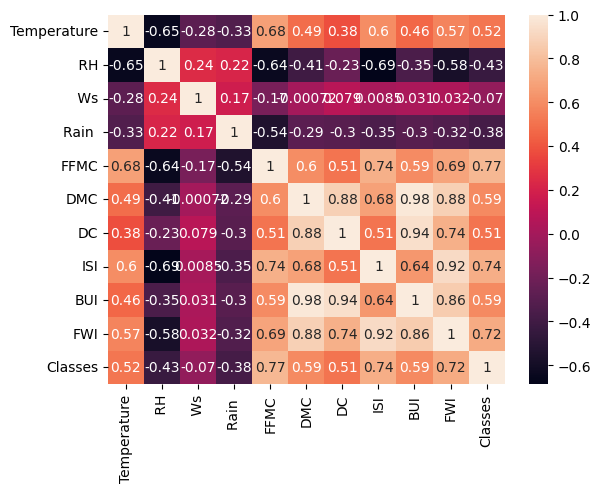

In [119]:
sns.heatmap(df.iloc[:, 3::].corr(), annot=True)

In [120]:
df.iloc[:, 3::].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216


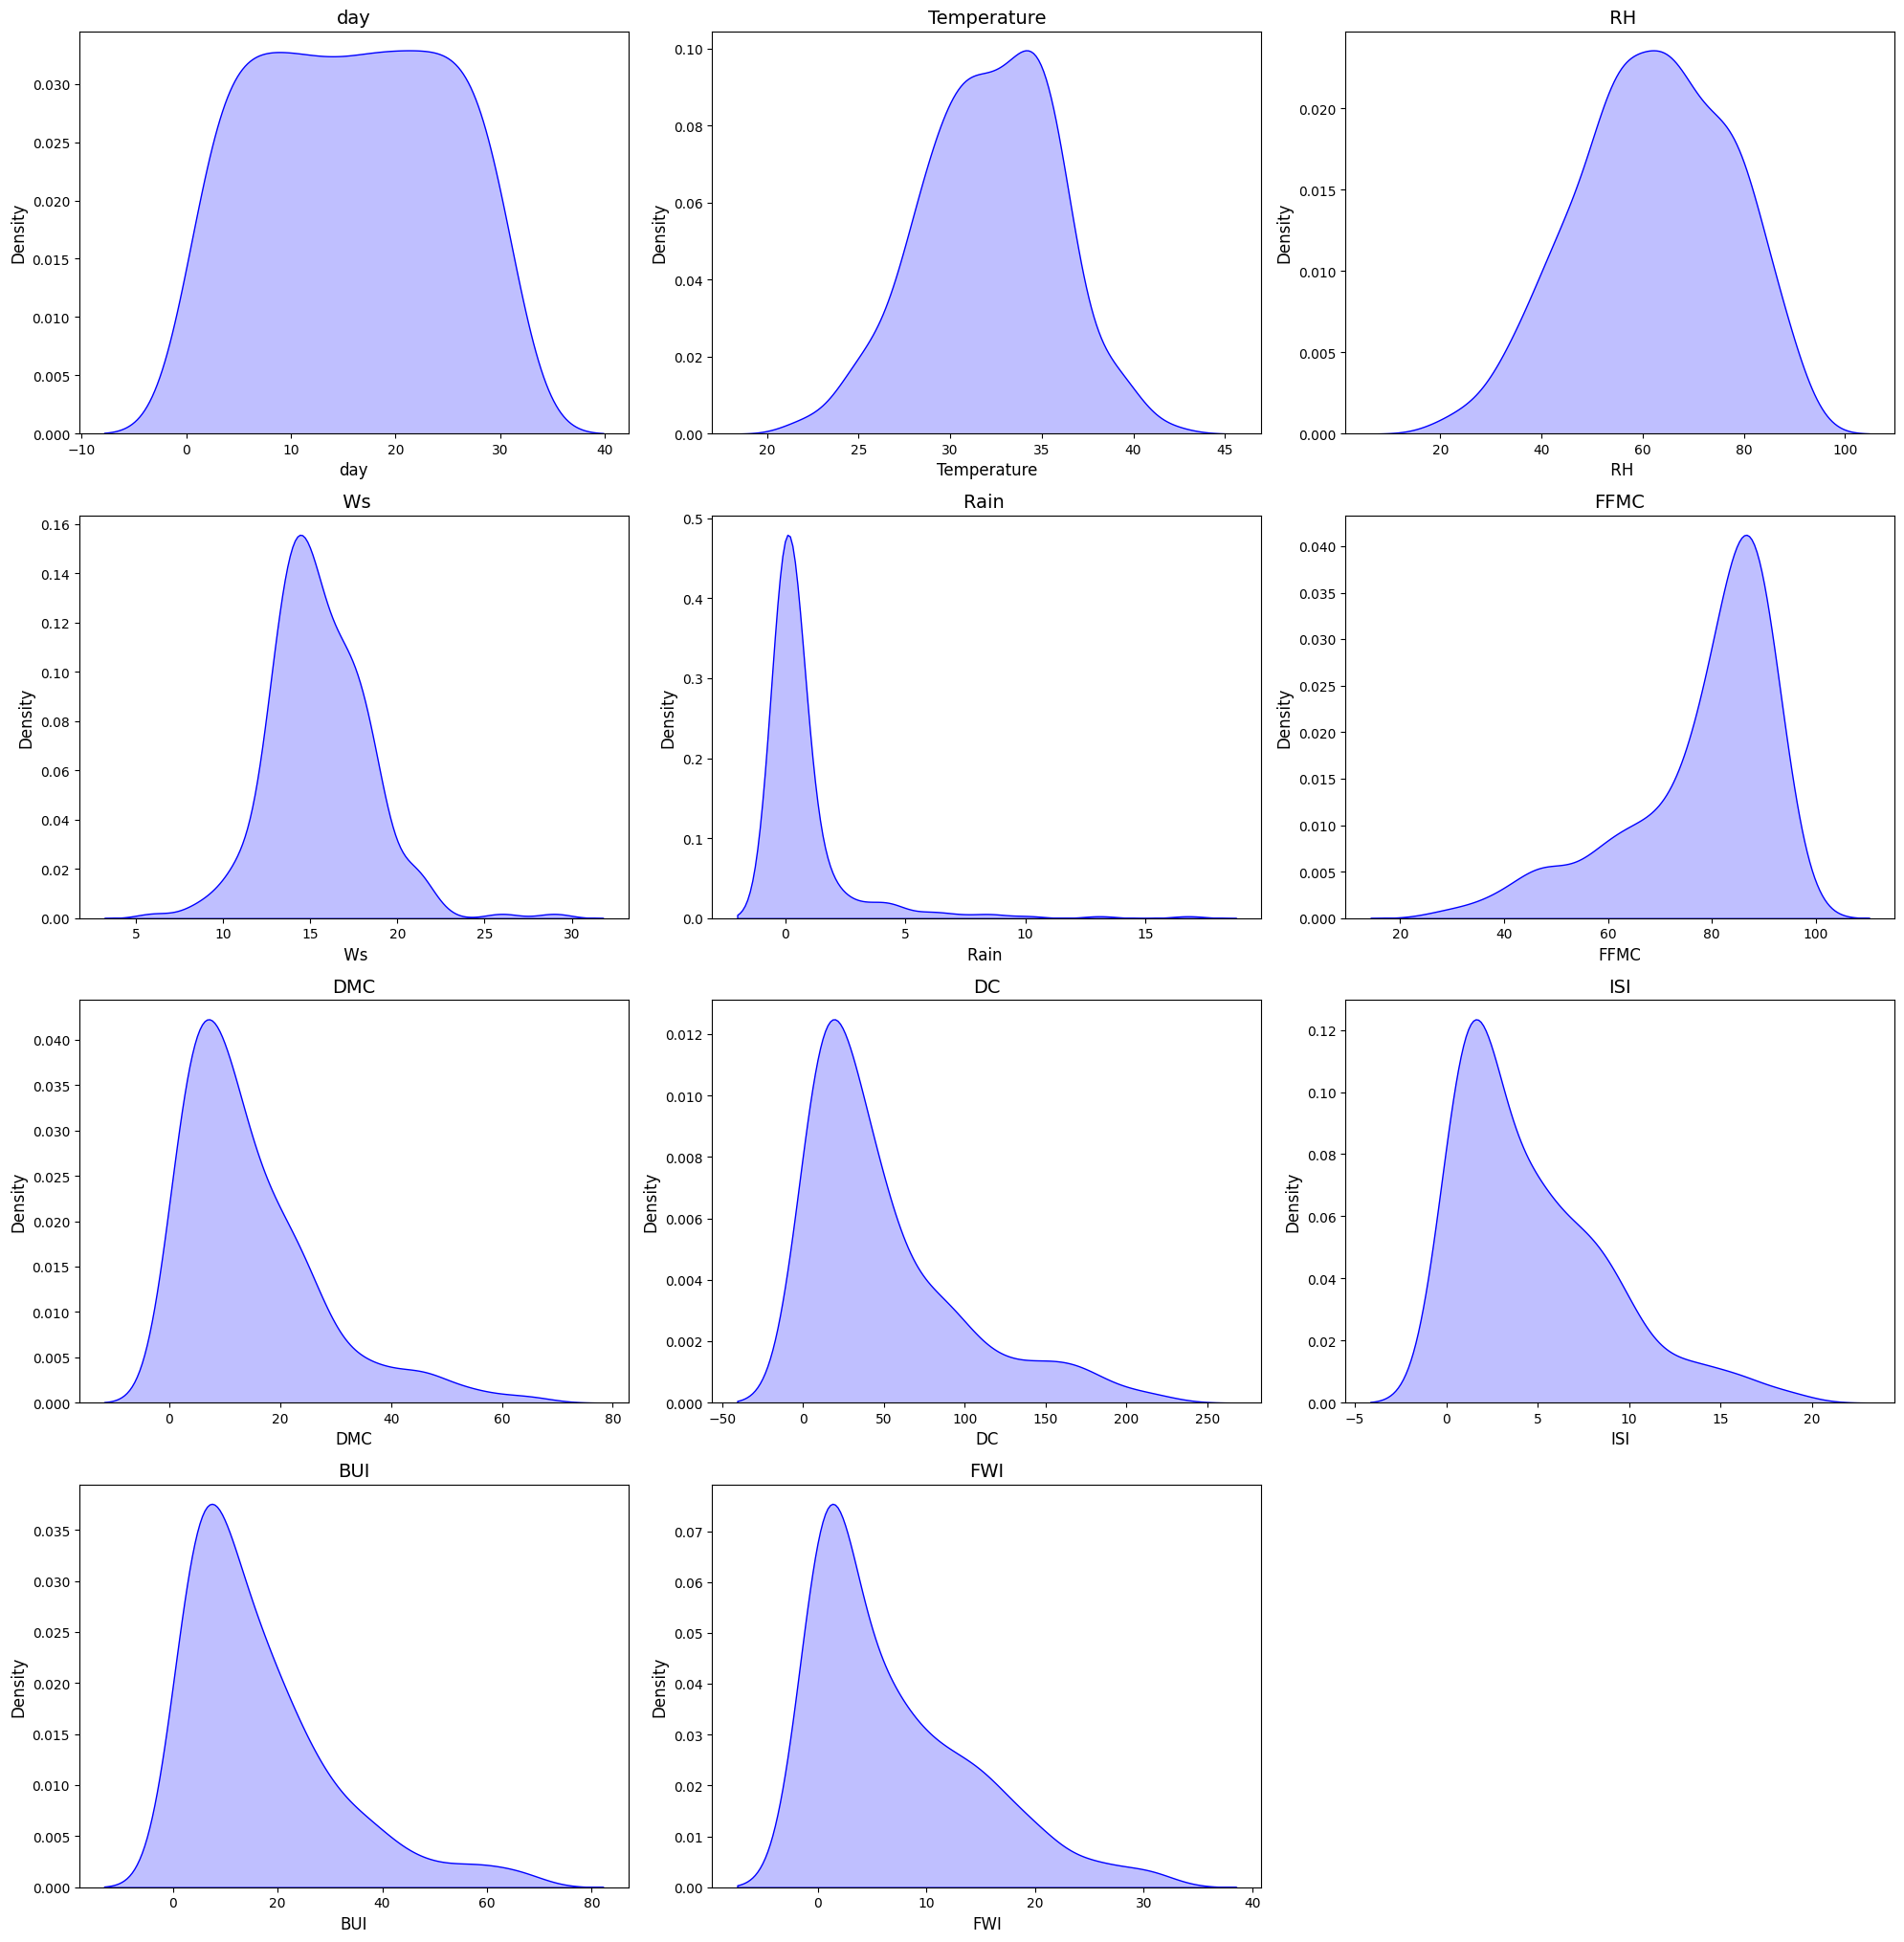

In [122]:
subplot_maker(df, num_cols)

In [124]:
grouped_by_month = df.iloc[:, 1::].groupby("month")

In [126]:
grouped_by_month.mean()

,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
month,,,,,,,,,,,,
6,2012.0,30.800000,65.283333,15.333333,0.975000,72.366667,9.305000,27.301667,3.265000,10.295000,4.013333,0.416667
7,2012.0,32.983607,62.704918,16.065574,0.455738,81.145902,15.277049,46.757377,4.814754,16.980328,7.021311,0.622951
8,2012.0,35.338710,53.983871,15.322581,0.448387,86.175806,25.450000,92.698387,7.703226,29.420968,13.161290,0.822581
9,2012.0,29.366667,66.450000,15.250000,1.188333,71.348333,8.321667,29.568333,3.086667,9.636667,3.741667,0.383333


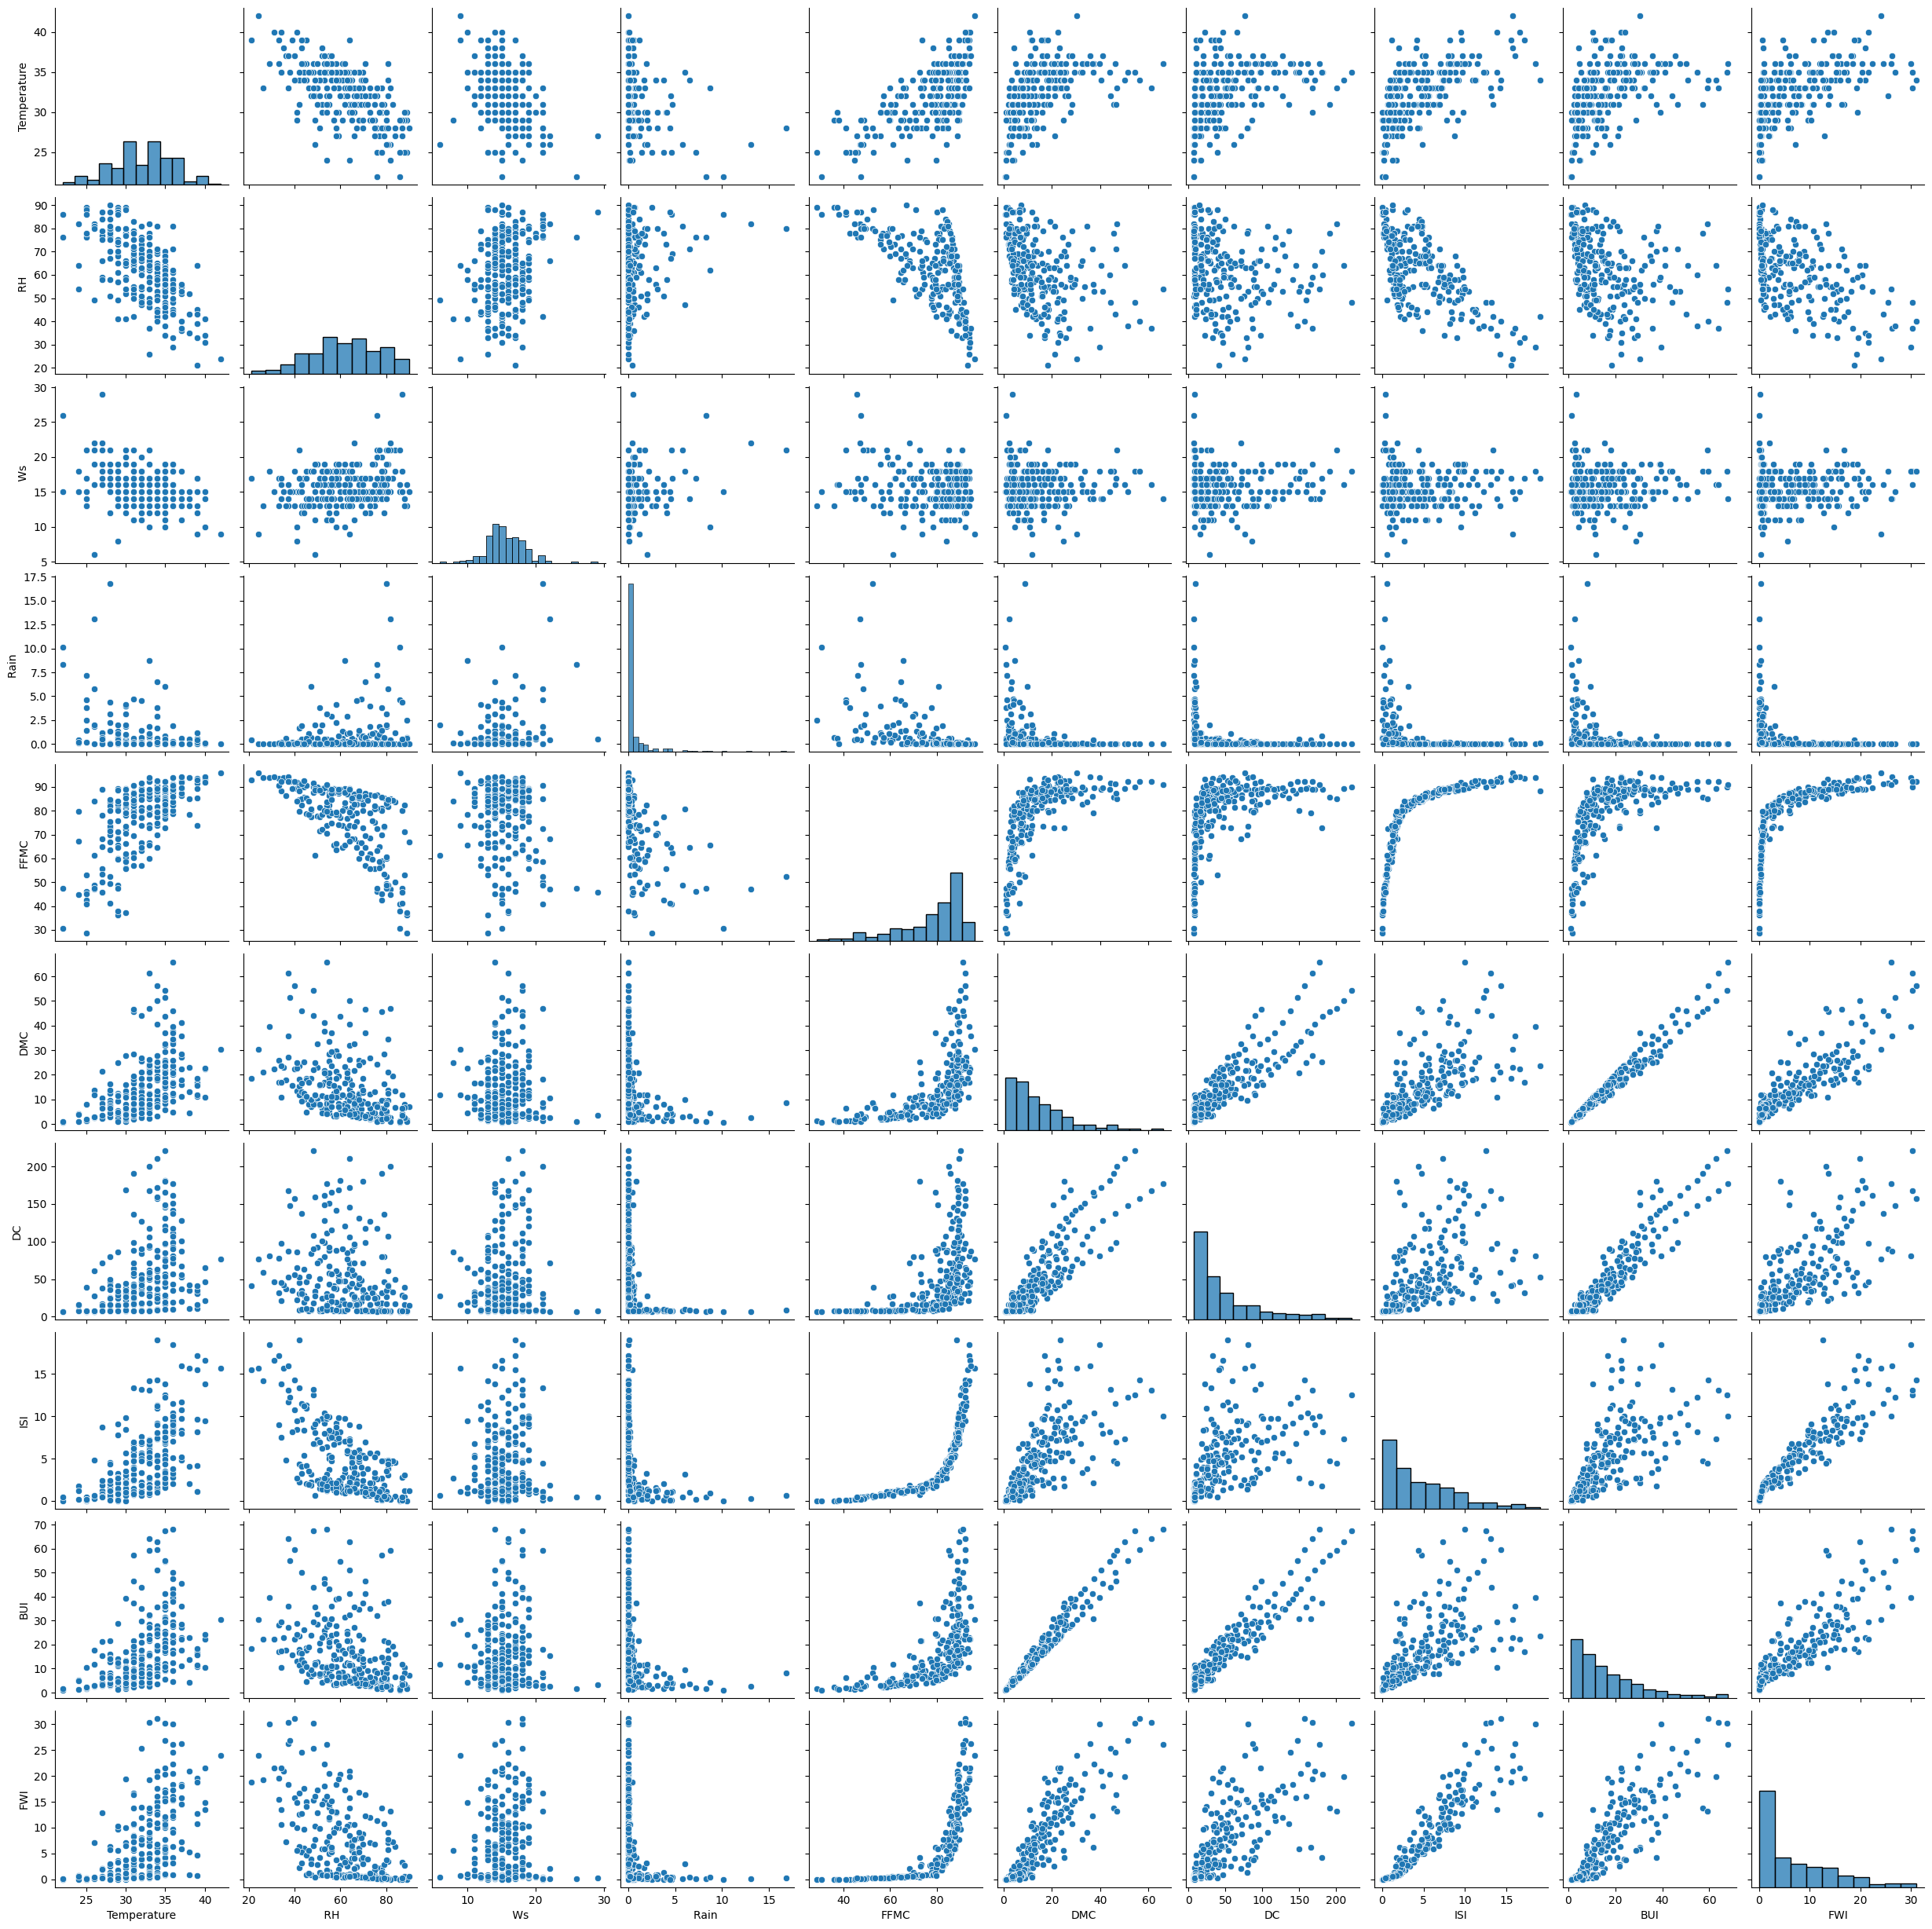

In [129]:
sns.pairplot(df.iloc[:, 3:-1])
plt.show()

In [137]:
df["Region"] = 0
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0


In [ ]:
df.loc[122::, "Region"] = 1

In [146]:
df.iloc[121]

day              30.0
month             9.0
year           2012.0
Temperature      25.0
 RH              78.0
 Ws              14.0
Rain              1.4
FFMC             45.0
DMC               1.9
DC                7.5
ISI               0.2
BUI               2.4
FWI               0.1
Classes           0.0
Region            0.0
Name: 121, dtype: float64

In [148]:
df.drop(["day", "month", "year"], axis=1, inplace=True)

In [150]:
X = df.drop("FWI", axis=1)
y = df["FWI"]

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
def correlation_for_drop(df: pd.DataFrame, threshold: float = 0.85):
    columns_to_drop = set()
    correlations = df.corr()
    col_len = len(correlations.columns)
    
    for i in range(col_len):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                columns_to_drop.add(correlations.columns[i])

    return columns_to_drop

In [155]:
columns_dropped = correlation_for_drop(X)
X_train.drop(columns_dropped, axis=1, inplace=True)
X_test.drop(columns_dropped, axis=1, inplace=True)

In [157]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [159]:
y_pred = model.predict(X_test_scaled)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2: ", score, "MSE: ", mse, "MAE: ", mae)

R2:  0.9805895859259882 MSE:  0.5882990110708683 MAE:  0.5049978694165684


In [162]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2: ", score, "MSE: ", mse, "MAE: ", mae)

R2:  0.9430507350726564 MSE:  1.7260423250231405 MAE:  1.0093958923873403


In [163]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2: ", score, "MSE: ", mse, "MAE: ", mae)

R2:  0.9801058063273601 MSE:  0.6029616070548585 MAE:  0.5192048325844753


In [164]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2: ", score, "MSE: ", mse, "MAE: ", mae)

R2:  0.8676961352267807 MSE:  4.009921298441004 MAE:  1.683441634013671


In [182]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

lasso_model = LassoCV(cv=20)
ridge_cv = RidgeCV(cv=32)
EN_cv = ElasticNetCV(cv=7)


In [183]:
lasso_model.fit(X_train_scaled, y_train)

y_pred = lasso_model.predict(X_test_scaled)

score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2: ", score, "MSE: ", mse, "MAE: ", mae)

R2:  0.9799125012514609 MSE:  0.6088203787715694 MAE:  0.5222058531692384


In [184]:
ridge_cv.fit(X_train_scaled, y_train)

y_pred = ridge_cv.predict(X_test_scaled)

score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2: ", score, "MSE: ", mse, "MAE: ", mae)

R2:  0.9722193780965626 MSE:  0.8419867979327498 MAE:  0.6869262008277133


In [175]:
EN_cv.fit(X_train_scaled, y_train)

y_pred = EN_cv.predict(X_test_scaled)

score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2: ", score, "MSE: ", mse, "MAE: ", mae)

R2:  0.9783135709454207 MSE:  0.6572814324218427 MAE:  0.5664805557220227


In [185]:
!pip3 install lazypredict


  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl.metadata (17 kB)
  Using cached xgboost-3.0.2-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
  Using cached flask-3.1.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached pyarrow-20.0.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Using cached sqlalchemy-2.0.41-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.6 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached importlib_metadata-8.7.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using ca

In [1]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets 
from sklearn.utils import shuffle
import numpy as np


In [2]:
diabetes_df = datasets.load_diabetes()
diabetes_df.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10))

In [3]:
X, y = shuffle(diabetes_df.data, diabetes_df.target, random_state=42)

In [4]:
X = X.astype(np.float32)

In [5]:
offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [6]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, preds = reg.fit(X_train, X_test, y_train, y_test)


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Number of data points in the train set: 397, number of used features: 10
[LightGBM] [Info] Start training from score 153.193955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [9]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,0.25,0.42,54.86,0.09
ExtraTreesRegressor,0.22,0.40,55.70,0.14
RandomForestRegressor,0.22,0.40,55.90,0.29
LarsCV,0.16,0.35,58.03,0.01
LassoLarsCV,0.15,0.35,58.16,0.02
LassoCV,0.15,0.35,58.18,0.06
LGBMRegressor,0.15,0.35,58.22,0.21
LassoLarsIC,0.15,0.35,58.23,0.02
LassoLars,0.15,0.34,58.26,0.01
